SpatialCorr offers a number of statistical tests for testing for spatially varying correlation:

1. Within-Region (WR) test that tests for varying correlation within each histological region
   1) Test across the slide. The null hypothesis holds that for all regions, the correlation is static within each region. A low p-value thus indicates that there exists a region with putative spatially varying correlation.
   2) Test within a specific region. For a given region, the null hypothesis is that the correlation is static within the region. A low p-value indicates spatially varying correlation across the region.

2.  Between-Region (BR) test that tests for varying correlation between each histological region
   1)  Test across the slide. The null hypothesis holds that all regions share the same correlation structure. A low p-value thus indicates that there exists a region with putatively different correlation from another region.
   2)  Test between two specific regions. For a given pair of regions, the null hypothesis is that the correlation is the same between these two regions. A low p-value indicates that the correlation differs.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import sys
from anndata import AnnData
import scanpy as sc
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
import spatialcorr

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Set data path
data_path = "D:/Desktop/MGI/CODE/"

In [3]:
# data
data = sc.read_h5ad(data_path + "Data/SS200000116BR_E6.bin200.h5ad")
data

AnnData object with n_obs × n_vars = 17574 × 30523
    obs: 'orig.ident', 'x', 'y'
    obsm: 'spatial'

In [4]:
# annotation data
anno_data = pd.read_csv(data_path + "Output/RCTD_results.csv", index_col=0)
anno_data.index = anno_data.index.rename('ID')
anno_data.reset_index(inplace=True)
anno_data.drop(['x', 'y'], axis=1, inplace=True)
anno_data

,ID,spot_class,first_type,second_type,first_prob,second_prob,final_type
0,27487790701800,doublet_certain,Hepatocyte,Tumor-Cholang,0.363940,0.636060,Tumor-Cholang
1,29205777624400,doublet_certain,Tumor-Cholang,Hepatocyte,0.635929,0.364071,Tumor-Cholang
2,31782757998200,doublet_certain,Tumor-Cholang,Hepatocyte,0.638376,0.361624,Tumor-Cholang
3,32641751459800,doublet_certain,Tumor-Cholang,Hepatocyte,0.723940,0.276060,Tumor-Cholang
4,39513699138800,doublet_certain,Tumor-Cholang,Hepatocyte,0.862991,0.137009,Tumor-Cholang
...,...,...,...,...,...,...,...
10184,6012954233600,singlet,Hepatocyte,Endothelial,0.544437,0.455563,Hepatocyte
10185,2576980383000,singlet,Hepatocyte,Tumor-Cholang,0.536803,0.463197,Hepatocyte
10186,17179869208000,singlet,Hepatocyte,Tumor-Cholang,0.397441,0.602559,Tumor-Cholang
10187,11166914969600,doublet_certain,Hepatocyte,Tumor-Cholang,0.370117,0.629883,Tumor-Cholang


In [5]:
data_obs = data.obs.copy()
data_obs.index = data_obs.index.rename('ID')
data_obs.reset_index(inplace=True)

data_obs['ID'] = data_obs['ID'].astype(str)
anno_data['ID'] = anno_data['ID'].astype(str)

merged_data = pd.merge(data_obs, anno_data, on='ID', how='inner')
merged_data

,ID,orig.ident,x,y,spot_class,first_type,second_type,first_prob,second_prob,final_type
0,27487790701800,sample,6400,7400,doublet_certain,Hepatocyte,Tumor-Cholang,0.363940,0.636060,Tumor-Cholang
1,29205777624400,sample,6800,11600,doublet_certain,Tumor-Cholang,Hepatocyte,0.635929,0.364071,Tumor-Cholang
2,31782757998200,sample,7400,7800,doublet_certain,Tumor-Cholang,Hepatocyte,0.638376,0.361624,Tumor-Cholang
3,32641751459800,sample,7600,10200,doublet_certain,Tumor-Cholang,Hepatocyte,0.723940,0.276060,Tumor-Cholang
4,39513699138800,sample,9200,15600,doublet_certain,Tumor-Cholang,Hepatocyte,0.862991,0.137009,Tumor-Cholang
...,...,...,...,...,...,...,...,...,...,...
10184,6012954233600,sample,1400,19200,singlet,Hepatocyte,Endothelial,0.544437,0.455563,Hepatocyte
10185,2576980383000,sample,600,5400,singlet,Hepatocyte,Tumor-Cholang,0.536803,0.463197,Hepatocyte
10186,17179869208000,sample,4000,24000,singlet,Hepatocyte,Tumor-Cholang,0.397441,0.602559,Tumor-Cholang
10187,11166914969600,sample,2600,0,doublet_certain,Hepatocyte,Tumor-Cholang,0.370117,0.629883,Tumor-Cholang


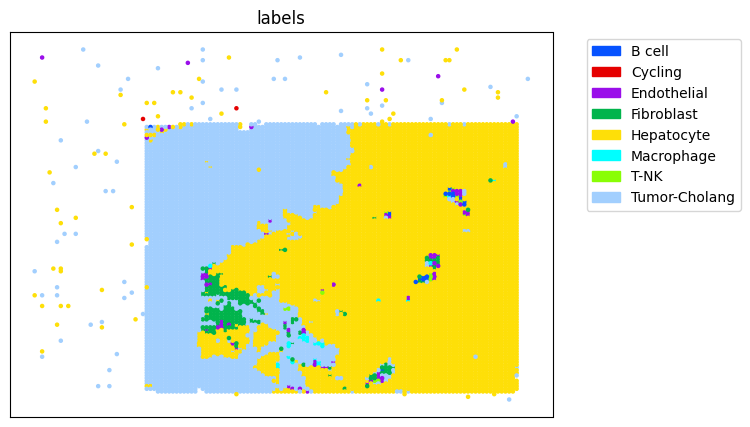

In [35]:
# Annotated region based on RCTD results
spatialcorr.plot_slide(
    merged_data, 
    merged_data['final_type'], 
    cmap='categorical', 
    colorbar=True,
    title="labels",
    row_key='y',
    col_key='x',
    ticks=False,
    dsize=5
    # spot_borders=True
)

In [6]:
# Dataframe to Anndata
merged_data_ann = AnnData(obs=merged_data, var=data.var)
merged_data_ann.obs

c:\Users\40868\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,ID,orig.ident,x,y,spot_class,first_type,second_type,first_prob,second_prob,final_type
0,27487790701800,sample,6400,7400,doublet_certain,Hepatocyte,Tumor-Cholang,0.363940,0.636060,Tumor-Cholang
1,29205777624400,sample,6800,11600,doublet_certain,Tumor-Cholang,Hepatocyte,0.635929,0.364071,Tumor-Cholang
2,31782757998200,sample,7400,7800,doublet_certain,Tumor-Cholang,Hepatocyte,0.638376,0.361624,Tumor-Cholang
3,32641751459800,sample,7600,10200,doublet_certain,Tumor-Cholang,Hepatocyte,0.723940,0.276060,Tumor-Cholang
4,39513699138800,sample,9200,15600,doublet_certain,Tumor-Cholang,Hepatocyte,0.862991,0.137009,Tumor-Cholang
...,...,...,...,...,...,...,...,...,...,...
10184,6012954233600,sample,1400,19200,singlet,Hepatocyte,Endothelial,0.544437,0.455563,Hepatocyte
10185,2576980383000,sample,600,5400,singlet,Hepatocyte,Tumor-Cholang,0.536803,0.463197,Hepatocyte
10186,17179869208000,sample,4000,24000,singlet,Hepatocyte,Tumor-Cholang,0.397441,0.602559,Tumor-Cholang
10187,11166914969600,sample,2600,0,doublet_certain,Hepatocyte,Tumor-Cholang,0.370117,0.629883,Tumor-Cholang


In [21]:
aligned_X = data[data.obs.index.isin(merged_data_ann.obs["ID"])].X
print(aligned_X.toarray())

[[  3.   0.   0. ...   5.   5.  66.]
 [  2.   0.   0. ...   4.  12. 110.]
 [  1.   0.   0. ...  24.  14. 167.]
 ...
 [  0.   0.   0. ...   0.   0.  13.]
 [  0.   0.   0. ...   0.   0.   1.]
 [  0.   0.   0. ...   0.   0.   1.]]


In [22]:
merged_data_ann = AnnData(X=aligned_X.toarray(), obs=merged_data, var=data.var)
merged_data_ann

c:\Users\40868\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 10189 × 30523
    obs: 'ID', 'orig.ident', 'x', 'y', 'spot_class', 'first_type', 'second_type', 'first_prob', 'second_prob', 'final_type'

In [25]:
sc.pp.normalize_total(merged_data_ann, target_sum=1e3)
merged_data_ann.X

array([[5.76479631e-01, 0.00000000e+00, 0.00000000e+00, ...,
        9.60799385e-01, 9.60799385e-01, 1.26825519e+01],
       [2.20361393e-01, 0.00000000e+00, 0.00000000e+00, ...,
        4.40722785e-01, 1.32216836e+00, 1.21198766e+01],
       [6.59282700e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.58227848e+00, 9.22995781e-01, 1.10100211e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.26213592e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.71140940e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.52380952e+00]])

In [10]:
adata = spatialcorr.load_dataset('GSM4284326_P10_ST_rep2')
adata

AnnData object with n_obs × n_vars = 621 × 16642
    obs: 'row', 'col', 'cluster'

In [26]:
print(adata.X)
print(merged_data_ann.X)
print()
print(adata.obs)
print(merged_data_ann.obs)
print()
print(adata.var)
print(merged_data_ann.var)

[[0.139 0.    0.134 ... 0.    0.545 0.   ]
 [0.115 0.003 0.138 ... 0.    0.471 0.   ]
 [0.089 0.    0.089 ... 0.    0.199 0.   ]
 ...
 [0.117 0.    0.14  ... 0.    0.434 0.   ]
 [0.263 0.021 0.138 ... 0.    1.    0.   ]
 [0.161 0.001 0.123 ... 0.    0.121 0.   ]]
[[5.76479631e-01 0.00000000e+00 0.00000000e+00 ... 9.60799385e-01
  9.60799385e-01 1.26825519e+01]
 [2.20361393e-01 0.00000000e+00 0.00000000e+00 ... 4.40722785e-01
  1.32216836e+00 1.21198766e+01]
 [6.59282700e-02 0.00000000e+00 0.00000000e+00 ... 1.58227848e+00
  9.22995781e-01 1.10100211e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.26213592e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.71140940e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.52380952e+00]]

       row  col  cluster
8x20    20    8        1
8x22    22    8        1
8x24    24    8        1
9x19    19    9        4
9x21    21

Kept 0/10189 spots.


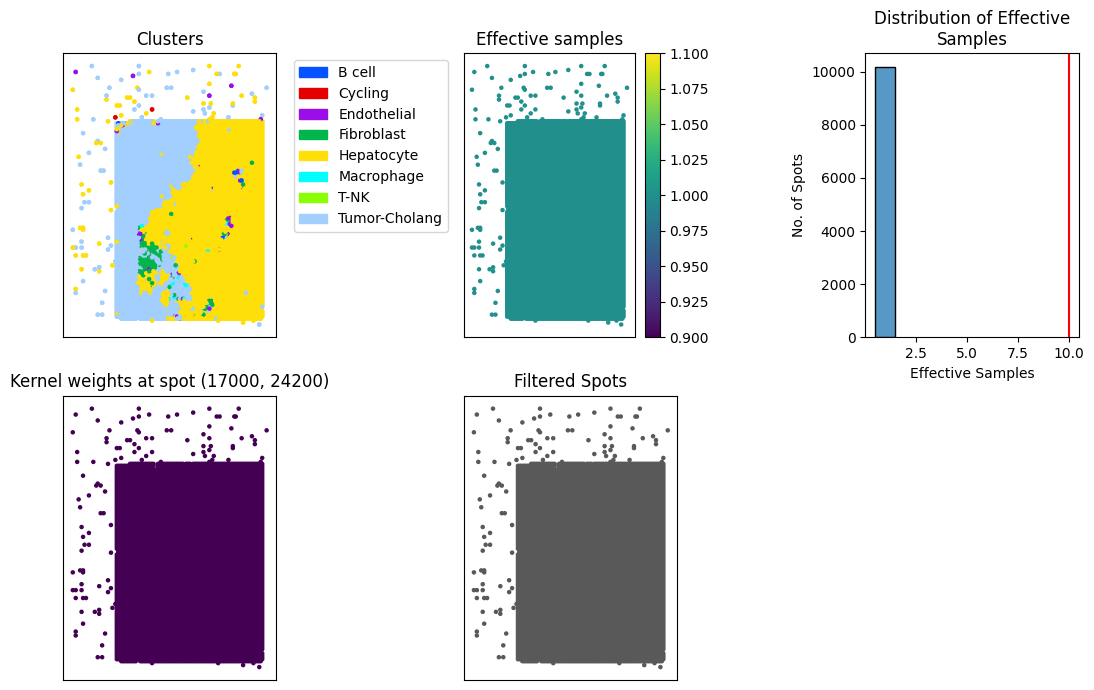

In [27]:
spatialcorr.wrappers.kernel_diagnostics(
    adata=merged_data_ann,
    cond_key='final_type',
    bandwidth=5,
    contrib_thresh=10,
    row_key='y',
    col_key='x',
    dsize=5,
    fpath='Output/kernel_diagnostic.png',
    fformat='png',
    dpi=150
)

In [43]:
top10 = ["IGLC3", "IGLC2", "IGHA2", "IGHM", "IGLL5", "IGHG2", "IGHG3", "IGHA1", "JCHAIN", "IGLV3-25"]

for element in top10:
    if element not in merged_data_ann.var_names:
        print(f"{element} is not in merged_data_ann.var_names")

Kept 0/10189 spots.


c:\Users\40868\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\40868\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Cluster 'T-NK' has a singular covariance matrix. Removing spots from this cluster
Cluster 'Cycling' has a singular covariance matrix. Removing spots from this cluster


OSError: [Errno 22] Invalid argument

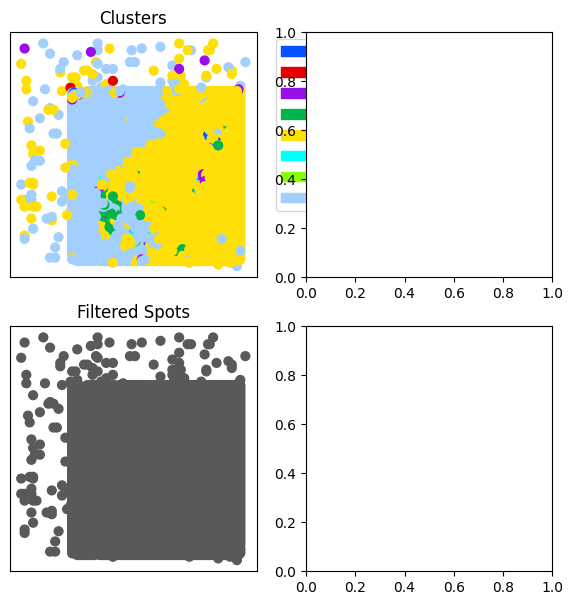

In [44]:
spatialcorr.analysis_pipeline_set(
    adata=merged_data_ann,  # The dataset
    genes=top10,            # The gene set                  
    cond_key='final_type',  # The key in `adata.obs` storing the cluster info
    max_perms=100,          # Maximum number of permutations to run
    row_key='y',
    col_key='x',
    dsize=40,               # Control the size of the dots
    verbose=0,              # Don't output any debugging information
)

Kept 476/621 spots.


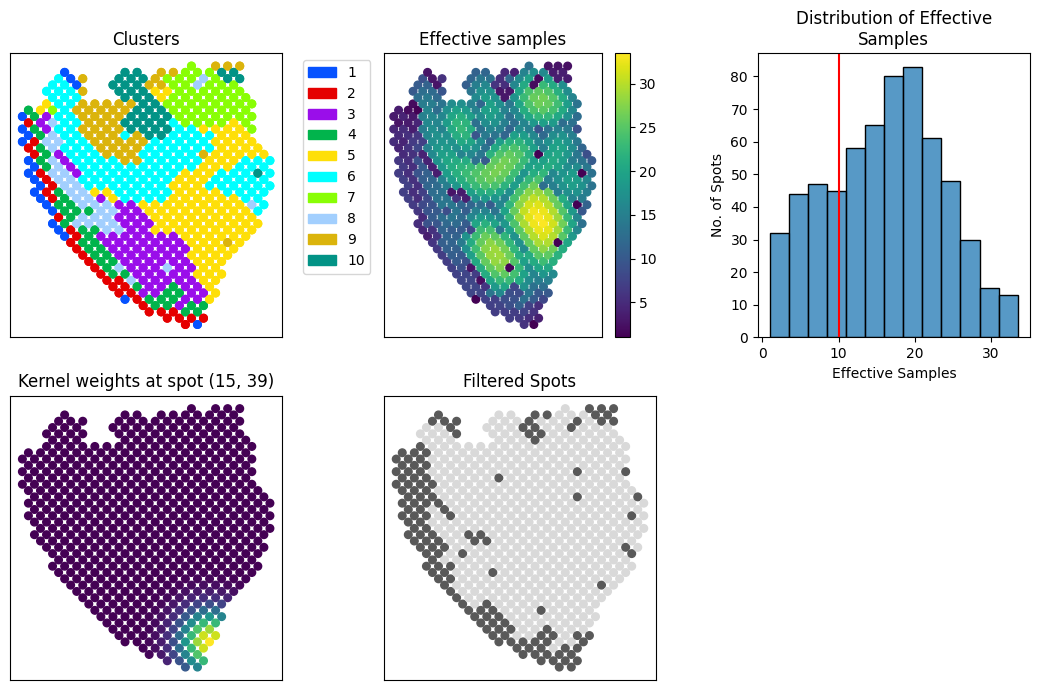

In [45]:
adata = spatialcorr.load_dataset('GSM4284326_P10_ST_rep2')

spatialcorr.wrappers.kernel_diagnostics(
    adata,
    'cluster',
    bandwidth=5,
    contrib_thresh=10,
    dsize=30,
    dpi=150
)

Kept 476/621 spots.


ValueError: cannot find context for 'fork'

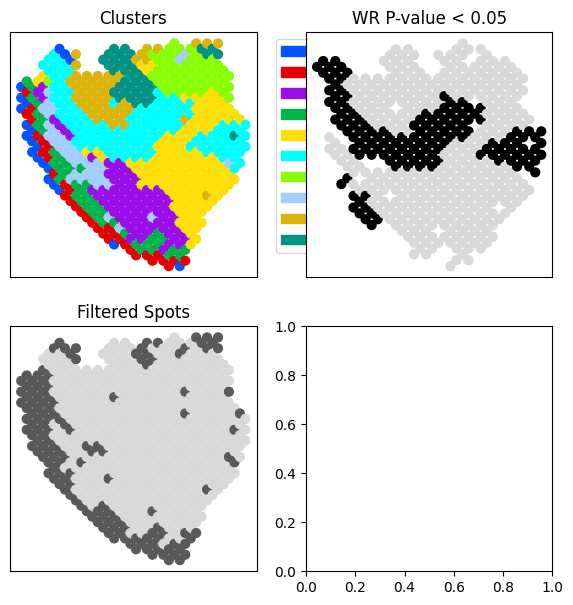

In [46]:
KERATINOCYTE_DIFF_GENES = [
    'KRT1',
    'KRT10',
    'KRT14',
    'KRT16',
    'KRT17',
    'KRT5',
    'KRT6A',
    'KRT6B',
    'KRT6C'
]

spatialcorr.analysis_pipeline_set(
    adata,                    # The dataset
    KERATINOCYTE_DIFF_GENES,  # The gene set                  
    'cluster',                # The key in `adata.obs` storing the cluster info
    max_perms=100,            # Maximum number of permutations to run
    dsize=40,                 # Control the size of the dots
    verbose=0,                 # Don't output any debugging information
)

In [ ]:
spatialcorr.plot.mult_genes_plot_correlation(
    merged_data_ann,
    top10,
    'final_type',
    row_key='y',
    col_key='x',
    estimate='local'
)